# Create PMELTS KLB1 phase diagram

Import required libraries:

In [1]:
import pyMelt as m
from pyMelt import phaseDiagramTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
klb1 = pd.read_csv('klb1_pmelts_grid.csv')
klb1.head()

,Unnamed: 0,pressure,temperature,cpx_mass,g_mass,liq_mass,ol_mass,pl_mass,spn_mass,opx_mass,...,g_CaO_wtpt,g_Fe2O3_wtpt,g_FeO_wtpt,g_MgO_wtpt,g_Na2O_wtpt,g_SiO2_wtpt,g_TiO2_wtpt,g_almandine,g_grossular,g_pyrope
0,4,0.001,1120,0.057181,0.0,0.000000,0.667873,0.094423,0.0,0.180523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0.001,1130,0.055305,0.0,0.004936,0.670316,0.093016,0.0,0.176426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,0.001,1140,0.046902,0.0,0.039629,0.687438,0.080517,0.0,0.145514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0.001,1150,0.030923,0.0,0.120965,0.729417,0.047606,0.0,0.071089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,0.001,1160,0.007893,0.0,0.209272,0.771065,0.011770,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename columns to conform with pyMelt convention:

In [3]:
for col in klb1.columns:
    if col[:2] == 'ol':
        klb1['olv_'+col[3:]] = klb1[col]
        klb1.drop(col, axis=1, inplace=True)
    elif col[:1] == 'g':
        klb1['grt_'+col[2:]] = klb1[col]
        klb1.drop(col, axis=1, inplace=True)
    elif col[:2] == 'pl':
        klb1['plg_'+col[3:]] = klb1[col]
        klb1.drop(col, axis=1, inplace=True)

Add cation fractions that are useful for lattice-strain partition coefficient calculations:

In [4]:
# Properties needed for cpx Ds
klb1['cpx_xMgM1'] = klb1['cpx_diopside'] + klb1['cpx_clinoenstatite'] + 0.5*klb1['cpx_buffonite'] + 0.5*klb1['cpx_alumino-buffonite']
klb1['cpx_xCaM2'] = klb1['cpx_diopside'] + klb1['cpx_hedenbergite'] + klb1['cpx_buffonite'] + klb1['cpx_alumino-buffonite'] + klb1['cpx_essenite']
klb1['cpx_xAlM1'] = klb1['cpx_alumino-buffonite'] + klb1['cpx_essenite']

# Garnet Ds:
klb1['grt_uvarovite'] = 0.0
klb1['grt_spessartine'] = 0.0
klb1['grt_andradite'] = 0.0

In [5]:
klb1_grid = phaseDiagramTools.gridsMelts(klb1)

In [6]:
phased = phaseDiagramTools.phaseDiagram(klb1_grid)

/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:162: RuntimeWarning: invalid value encountered in scalar divide
  dydx = (y.loc[last_finite_ind] - y.loc[last_finite_ind - 1])/(x.loc[last_finite_ind] - x.loc[last_finite_ind - 1])
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:162: RuntimeWarning: invalid value encountered in scalar divide
  dydx = (y.loc[last_finite_ind] - y.loc[last_finite_ind - 1])/(x.loc[last_finite_ind] - x.loc[last_finite_ind - 1])
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:162: RuntimeWarning: invalid value encountered in scalar divide
  dydx = (y.loc[last_finite_ind] - y.loc[last_finite_ind - 1])/(x.loc[last_finite_ind] - x.loc[last_finite_ind - 1])
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:162: RuntimeWarning: invalid value encountered in scalar divide
  dydx = (y.loc[last_finite_ind] - y.loc[last_finite_ind - 1])/(x.loc[last_finite_ind] - x.loc[last_finite_ind - 1])
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:162: R

In [7]:
f = open( "melts_klb1.p", "wb" )
pickle.dump(phased, f)
f.close()

## Check the interpolated phase diagram

### Mass proportions

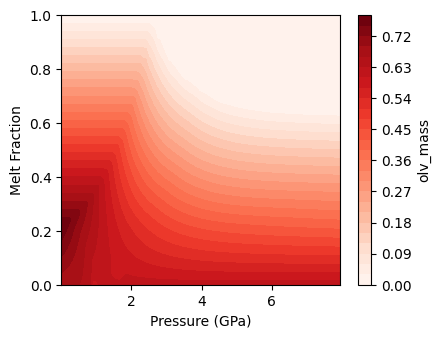

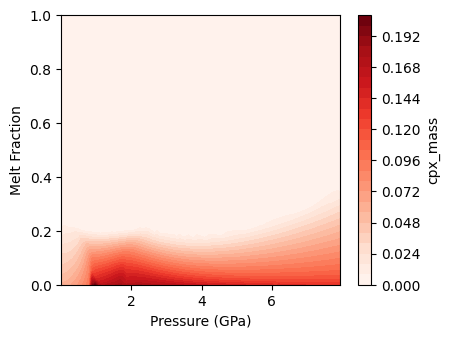

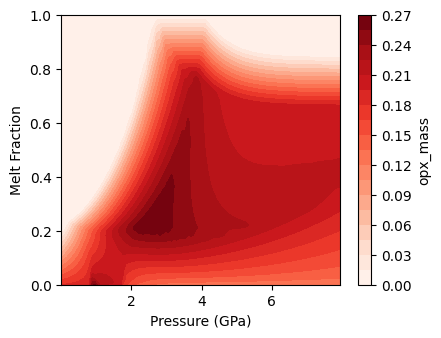

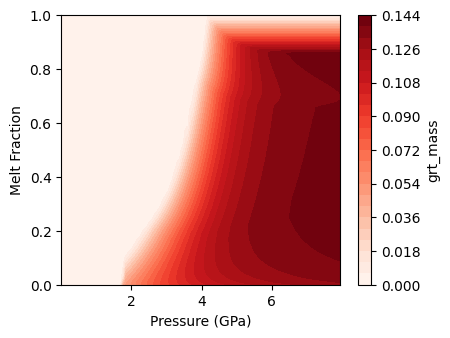

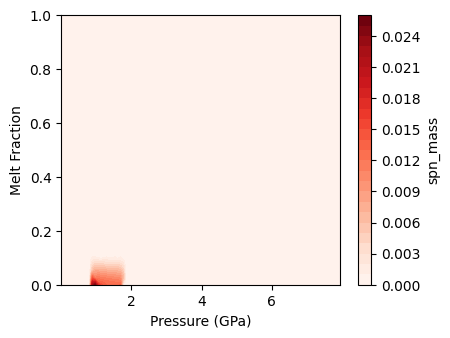

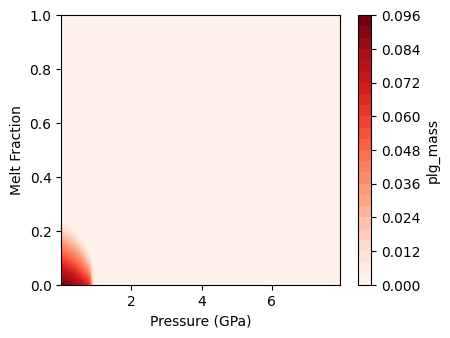

In [8]:
phases = ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg']

for ph in phases:
    f, a = phased.plot_TxSection(ph + '_mass', mask_mineral_out=False)
    plt.show()

### Liquid compositions

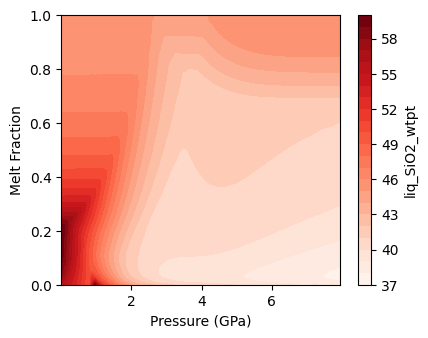

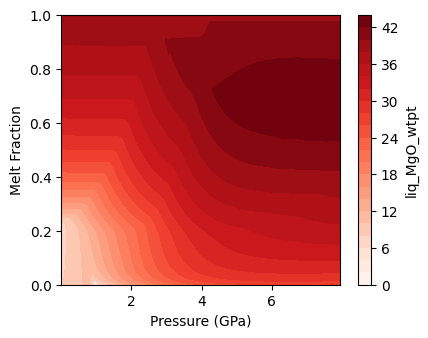

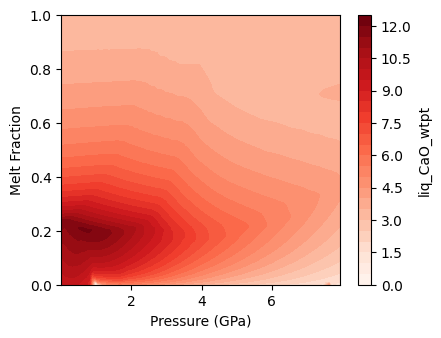

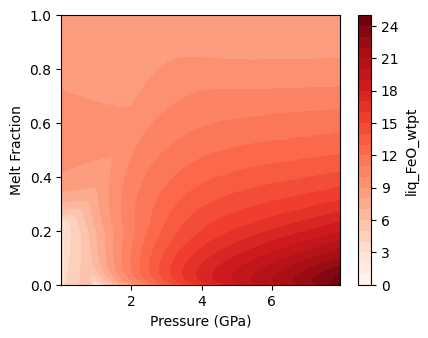

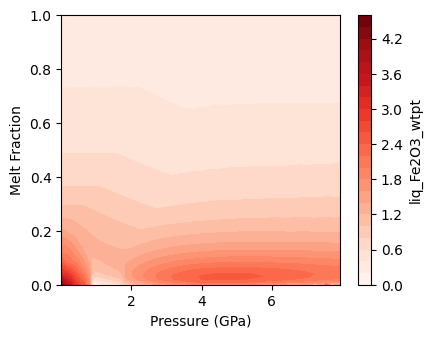

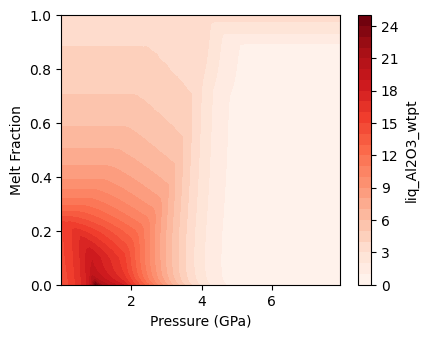

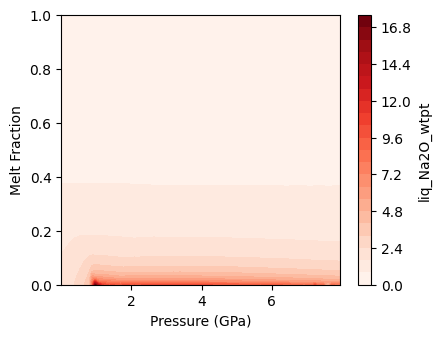

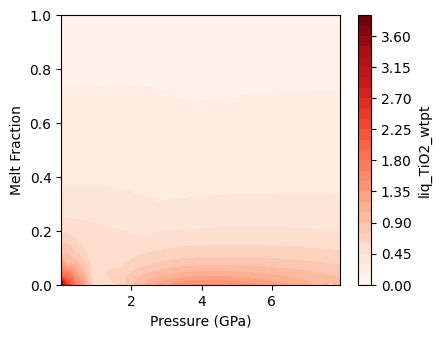

In [9]:
oxides = ['SiO2', 'MgO', 'CaO', 'FeO', 'Fe2O3', 'Al2O3', 'Na2O', 'TiO2']

for ox in oxides:
    f, a = phased.plot_TxSection('liq_' + ox + '_wtpt')
    plt.show()


### Important parameters for D calculations

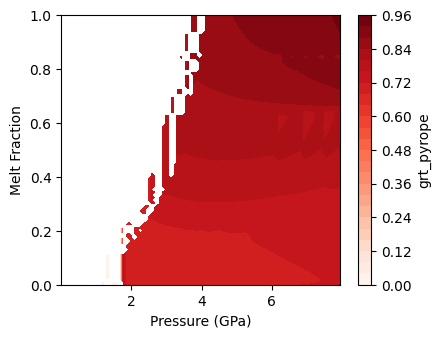

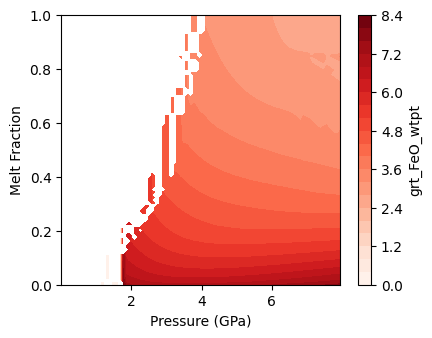

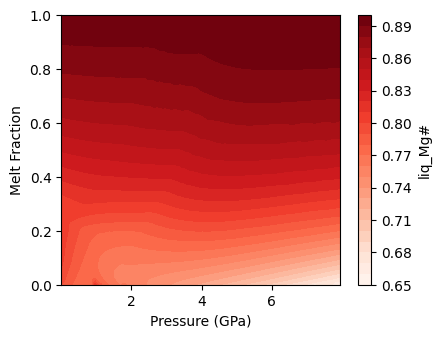

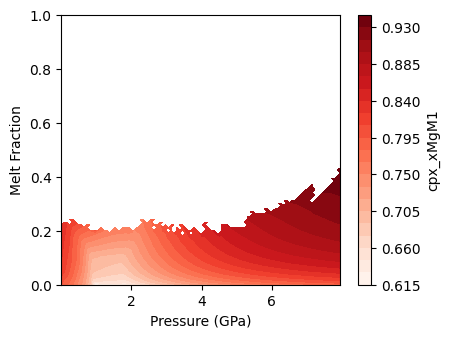

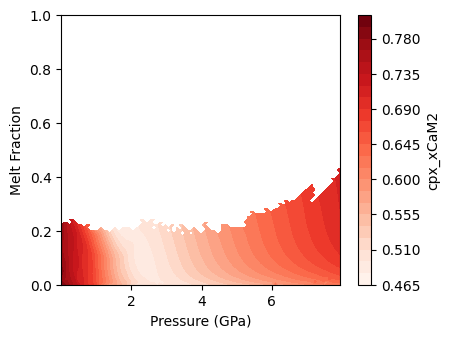

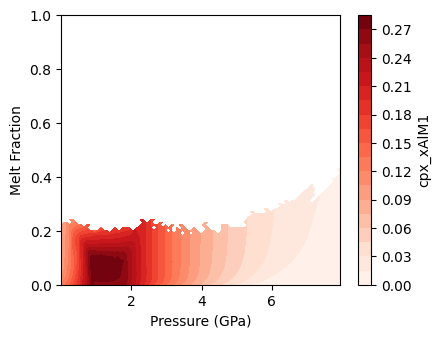

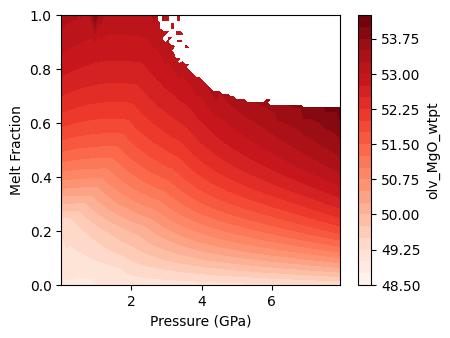

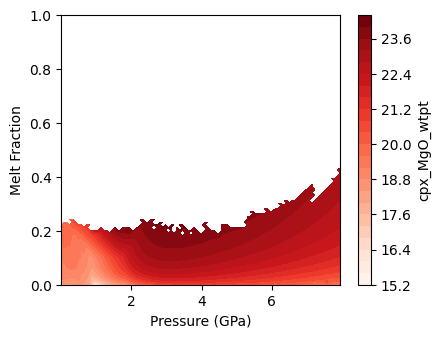

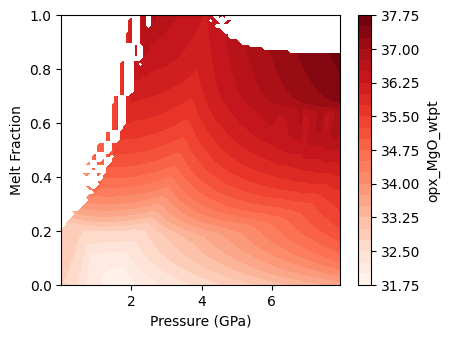

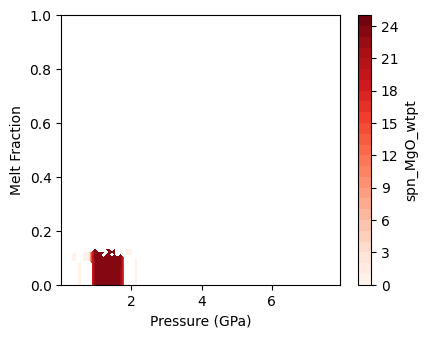

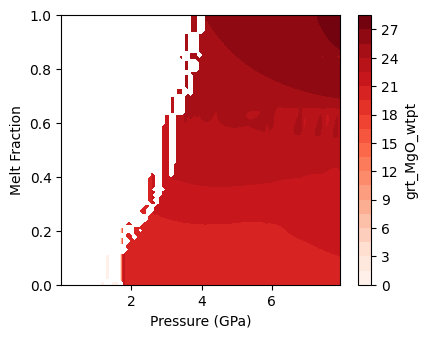

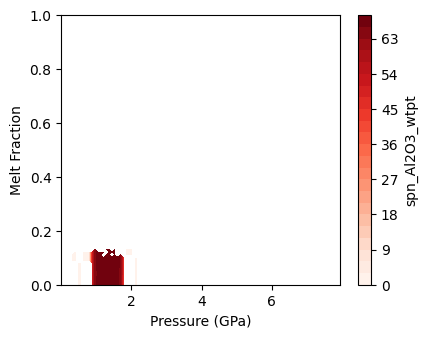

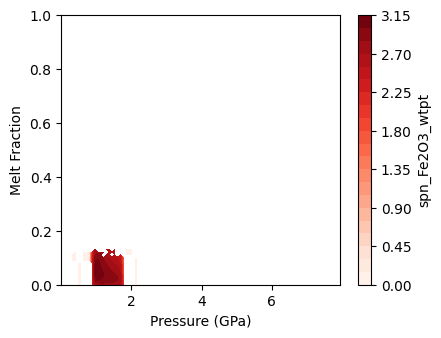

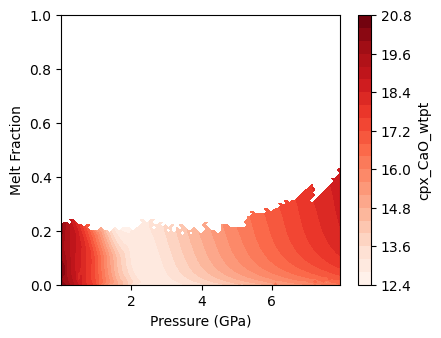

In [11]:
params = ['grt_pyrope', 'grt_FeO_wtpt', 'liq_Mg#', 'cpx_xMgM1', 'cpx_xCaM2', 'cpx_xAlM1',
          'olv_MgO_wtpt', 'cpx_MgO_wtpt', 'opx_MgO_wtpt', 'spn_MgO_wtpt', 'grt_MgO_wtpt',
           'spn_Al2O3_wtpt', 'spn_Fe2O3_wtpt', 'cpx_CaO_wtpt']

for pr in params:
    if pr[:3] == 'liq':
        mask=False
    else:
        mask=True
    f, a = phased.plot_TxSection(pr, mask_mineral_out=mask)
    plt.show()